## О проекте 
Исследование причины неэффективности привлечения пользователей 

Развлекательноое приложения Procrastinate Pro+ несколько прошлых месяцев постоянно несло убытки. А маркетинг и привлечение пользователей была вложено много денег, но безрезультатно. 

Имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях
* выгрузка их покупок за этот период
* рекламные расходы

**Цель исследования:**
1. Выявить причины неэффективности привлечения пользователей

**Ход  исследования:**
1. Обзор данных:
* ознакомиться с данными


2. Предобработка данных:
* проверить данные на наличие пропусков
* проверить данные на наличие аномалий 
* при необходимости заменить пропуски
* построить профили пользователей 



3. Исследовательский анализ:
* определить минимальную и максимальную дату привлечения пользователей 
* выяснить, из каких стран пользователи, так же какие страны дают больше всего платящих пользователей
* выяснить, какими устройствами пользуются пользователи, так же с каких устройств чаще всего заходят платящие пользователи
* выяснить, по каким рекламным каналам шло привлечение пользователей , так же какие каналы приносят больше всего платящих пользователей 


4. Маркетинг: 
* выяснить, сколько денег потратила компания всего / на каждый источник 
* выяснить, сколько в среднем стоило привлечение одного покупателя из каждого источника 
* выяснить, окупается ли реклама, направленная на привлечение пользователей в целом? 
* выяснить, какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* выяснить причины проблем с окупаемостью? Изучить конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

5. Выводы:
* описать возможные причины неэффективности привлечения пользователей 
* сформировать рекомендации для рекламного отдела 

### Описание данных:


Таблица `visits_log_short` - лог сервера с информацией о посещениях сайта:

* `User Id` — уникальный идентификатор пользователя
* `Device` — категория устройства пользователя
* `Session start` — дата и время начала сессии
* `Session End` — дата и время окончания сессии
* `Channel` — идентификатор рекламного источника, из которого пришел пользователь
* `Region` - страна пользователя

Таблица `orders_log_short` - информация о заказах:

* `User Id` — уникальный id пользователя, который сделал заказ
* `Event Dt` — дата и время покупки
* `Revenue` — выручка

Таблица `costs_short` - информация о затратах на маркетинг:

* `Channel` — идентификатор рекламного источника
* `Dt` — дата
* `Costs` — затраты на этот рекламный источник в этот день

## Обзор данных 

In [1]:
# импортируем необходимые библиотеки 
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from datetime import datetime, timedelta  

In [2]:
try: #серверный путь
    visits = pd.read_csv('/datasets/visits_info_short.csv') 
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except: #локальный путь 
    visits = pd.read_csv('C:/Users/User/Desktop/visits_info_short.csv') # сессии
    orders = pd.read_csv('C:/Users/User/Desktop/orders_info_short.csv') # заказы
    costs = pd.read_csv('C:/Users/User/Desktop/costs_info_short.csv') # траты на рекламу

Ознакомимся с данным в таблице `visits`, где представлены логи с информацией о посещениях сайта:

In [3]:
display(visits.head())
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
f'Дубликатов в таблице: {len(visits[visits.duplicated()])}'.format(len(visits.duplicated()))

'Дубликатов в таблице: 0'

Отметим, что в столбцах `Session start` и `Session End` указаны дата и время начала и конца сессии соотевтсевнно, но тип данных в этих столбцах `object`, вместо типа данных `datetime`. 
Пропущенных значений  и дубликатов в таблице нет.

Ознакомимся с таблицей `orders`, где представлены данные о заказах.

In [5]:
display(orders.head())
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
f'Дубликатов в таблице: {len(orders[orders.duplicated()])}'.format(len(orders.duplicated()))

'Дубликатов в таблице: 0'

В таблице нет пропущенных значений и дубликатов. Однако так же неверный тип данных у столбца `Event DT`, где указана дата заказа.

Ознакомимся с данными в таблице `costs`, которая содержит информацию о затратах на маркетинг.

In [7]:
display(costs.head())
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [8]:
f'Дубликатов в таблице: {len(costs[costs.duplicated()])}'.format(len(costs.duplicated()))

'Дубликатов в таблице: 0'

В таблице так же нет пропусков и дубликатов, однако есть нарушение в типах данных: у столбца, содержащего дату неверный тип данных. 

### Выводы: 

1. Из документации к данным:

Таблица `visits` содержит лог сервера с информацией о посещениях сайта:

* `User Id` — уникальный идентификатор пользователя
* `Device` — категория устройства пользователя
* `Session start` — дата и время начала сессии
* `Session End` — дата и время окончания сессии
* `Channel` — идентификатор рекламного источника, из которого пришел пользователь
* `Region` - страна пользователя

Таблица `orders` содержит информацию о заказах:

* `User Id` — уникальный id пользователя, который сделал заказ
* `Event Dt` — дата и время покупки
* `Revenue` — выручка

Таблица `costs` содержит информацию о затратах на маркетинг:

* `Channel` — идентификатор рекламного источника
* `Dt` — дата
* `Costs` — затраты на этот рекламный источник в этот день

2. В таблице:

* `visits_log_short`, в столбцах `Session start` и `Session End` необходимо исправить тип данных на `datetime`, вместо `object`
* `orders_log_short`, в столбце  `Event Dt` необходимо исправить тип данных на `datetime`, вместо `object`
* `costs_short`, в столбце `Dt`необходимо исправить тип данных на `datetime`, вместо `object`

3. В названиях столбцов есть нарушения стиля, названия необходимо привести к нижнему регистру, а так же в таблице `visits_log_short` в столбце `User Id` необходимо исправить название столбца на `user_id`.




## Предобработка данных

Сперва исправим нарушения в названии столбцов, что бы далее нам было проще работать:

In [9]:
#приводим названия к нижнему регистру, убираем пробел из названий 
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [10]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_') #приводим названия к нижнему регистру, удаляем пробел 
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
costs.columns = costs.columns.str.lower() #приводим названия стобцов к нижнему регистру
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Названия столбцов исправлены и соотвествуют правилам хорошего стиля. Далее исправим типы данных в таблицах.

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start']) # изменяем тип данных в столбцах на соответсвующий 
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Тип данных в таблицах и соотвествующих столбцах изменен.

Сформируем таблицу пользовательских профилей. Для этого используем функцию, разобранную в теоретиечской части . Функции необходимо передать 3 аргумента: таблица с сессиями, таблица с заказами и таблица с информацией о затратах на рекоаму. Функция вернет датафрейм, с пользовательскими сессиями:

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений: дата, канал, устройство и регион 
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [17]:
profiles = get_profiles(visits, orders, costs) # применяем функцию
display(profiles.head())
profiles.info()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


В таблице `df` указано:
* `user_id` - уникальный идентификатор пользователя
* `first_ts` - дата и время первого посещения 
* `channel` - "канал", по которому пользователь "пришел" 
* `device` - устройство, с которого была сессия
* `region` - регион, из которого пришел пользователь
* `dt` - - дата первого посещения 
* `month` - месяц первого посещения
* `payer` - платящий  ли пользователь
* `acquisition_cost` - стоимость привлечения пользователя 

Типы данных указаны верно. 

### Выводы:

1. В таблицах `visits`, `orders` и `costs` исправили нарушения стиля в названиях столбцов.
2. В таблицах `visits`, `orders` и `costs`, в столбцах с датой изменили тип данных с `object` на `datetime`
3. Составили таблицу профилей пользователей 

## Функции для анализ LTV, ROI, retention rate, conversion rate

Напишем функции для расчета LTV, ROI, retention rate, conversion rateздесь, что бы не писать длинные функции в разеделе "исследования", а только проводить анализ.

In [18]:
#функция расчета LTV  и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [19]:
#функция расчета удержания или retention rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ

### Минимальная и максимальная дата привлечения пользователей

Опеределим минимальную и максимальную дату привлечения пользователей.

In [25]:
min_date = profiles['dt'].min() #получаем минимальную дату в таблице 
max_date = profiles['dt'].max() #получаем максимальную дату в таблице 
display(f'Минимальная дата привлечения:{min_date}'.format(min_date))
(f'максимальная дата привлечения:{max_date}'.format(max_date))

'Минимальная дата привлечения:2019-05-01'

'максимальная дата привлечения:2019-10-27'

#### Выводы:

Таким образом:
* минимальная дата привлечения пользователя - 2019.05.01
* максимальная дата привлечения пользователя - 2019.10.27    

### Когортный анализ по странам

Выясним:
* количество пользователей, которые приходят в приложение из разных стран 
* из какой страны доля платящих пользователей наибольшая 

In [26]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [27]:
#строим таблицу 
country = (
    profiles
    .groupby('region')
    .agg({'user_id' : 'count', 'payer' :'mean'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns = {'user_id':'пользователи', 'payer' : 'платящие'}))
country['payer'] = (
    profiles
    .groupby('region')
    .agg({'payer' : 'mean'}))
country = country.rename(columns = {'payer' : '% платящих'})
format_dict = {'% платящих': '{:.2%}'} 
country = country.style.format(format_dict)
country


,пользователи,платящие,% платящих
region,,,
United States,100002,0.069019,6.90%
UK,17575,0.039829,3.98%
France,17450,0.037994,3.80%
Germany,14981,0.041119,4.11%


P.S. Уважаемый ревьюер, здесь я использую count, так как группировка исключает дубликаты и работа функции count будет равна работе функции nunique. Ниже, в целях учебного проекта использую nunique.

#### Выводы:

По таблице видно, что:
* наибольшее количество пользователей приходят в приложение из Америки
* наибольшая доля платящих пользовталей приходят в приложение из Америки 


* наименьшее количество пользователей приходят в приложение из Германии
* наименьшая доля платящих пользователей приходят в приложение из Франции

### Когортный анализ по устройствам 

Выясним:
* количество пользователей использующих какое-либо устройство 
* какое устройство предпочитают платящие пользователи 

In [28]:
#строим  таблицу 
device = (
    profiles
    .groupby('device')
    .agg({'user_id' : 'nunique', 'payer' : 'sum'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns = {'user_id':'пользователи', 'payer' : 'платящие'}))
device['payer'] = (
    profiles
    .groupby('device')
    .agg({'payer' : 'mean'}))
device = device.rename(columns = {'payer' : '% платящих'})
format_dict = {'% платящих': '{:.2%}'} 
device = device.style.format(format_dict)
device

,пользователи,платящие,% платящих
device,,,
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%
Mac,30042,1912,6.36%


#### Выводы:

По таблице видно, что:
* наибольшее количество пользователей приходят в приложение с Айфона 
* наибольшая доля платящих пользовталей приходят в приложение с Мак Бука 


* наименьшее количество пользователей приходят в приложение с Мак Бука 
* наименьшая доля платящих пользователей приходят в приложение с Персонального компьютера 

### Когортный анализ по каналу привлечения 

Выясним:
* количество пользователей, пришедших из каждого источника привлечения  
* какой канал привлечения  принес наибольшую долю платящих пользователей 

In [29]:
#строим сводную таблицу
channel = (
    profiles
    .groupby('channel')
    .agg({'user_id' : 'count', 'payer' : 'sum'})
    .sort_values(by=['user_id', 'payer'], ascending=False)
    .rename(columns = {'user_id':'пользователи', 'payer' : 'платящие'}))
channel['payer'] = (
    profiles
    .groupby('channel')
    .agg({'payer' : 'mean'}))

channel = channel.rename(columns = {'payer' : '% платящих'})
format_dict = {'% платящих': '{:.2%}'} 
channel = channel.style.format(format_dict) 
channel = channel.highlight_max(color='lightgreen').highlight_min(color='#cd4f39')
channel

,пользователи,платящие,% платящих
channel,,,
organic,56439,1160,2.06%
FaceBoom,29144,3557,12.20%
TipTop,19561,1878,9.60%
OppleCreativeMedia,8605,233,2.71%
WahooNetBanner,8553,453,5.30%
LeapBob,8553,262,3.06%
RocketSuperAds,4448,352,7.91%
MediaTornado,4364,156,3.57%
YRabbit,4312,165,3.83%


#### Выводы:

По таблице видно, что:
* наибольшее количество пользователей приходят в приложение из канала organic, то есть самостоятельно 
* наибольшая доля платящих пользовталей приходят в приложение из канала FaceBoom	


* наименьшее количество пользователей приходят в приложение из канала lambdaMediaAds
* наименьшая доля платящих пользователей приходят в приложение из канала organic

### Выводы: 

1. Опеределили минимальную и максимальную дату привлечения пользователей:
* минимальная дата привлечения пользователя - 2019.05.01
* максимальная дата привлечения пользователя - 2019.10.27    


2. Выяснили, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей:
* наибольшее количество пользователей приходят в приложение из Америки
* наибольшая доля платящих пользовталей приходят в приложение из Америки 


3. Выяснили, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи:
* наибольшее количество пользователей приходят в приложение с Айфона 
* наибольшая доля платящих пользовталей приходят в приложение с Мак Бука 

4. Опеределили какнал, который приносит больше всего платящих пользователей:
* наибольшее количество пользователей приходят в приложение из канала organic, то есть самостоятельно 
* наибольшая доля платящих пользовталей приходят в приложение из канала FaceBoom	


## Маркетинг 

Проанализируем:
* общую сумму расходов на маркетинг
* распределение расходов на маркетинг по каналам привлечения 
* распределение расходов на маркетинг по месяцам и каналам привлечения 

Для этого обратимся к таблице `costs`, где представлена информация о затратах на маркетинг и добавим столбец с указанием месяца:

In [30]:
costs['month'] = costs['dt'].astype('datetime64[M]') #добавляем столбец с указанием месяца
costs.head()

,dt,channel,costs,month
0,2019-05-01,FaceBoom,113.3,2019-05-01
1,2019-05-02,FaceBoom,78.1,2019-05-01
2,2019-05-03,FaceBoom,85.8,2019-05-01
3,2019-05-04,FaceBoom,136.4,2019-05-01
4,2019-05-05,FaceBoom,122.1,2019-05-01


### Общая сумма затрат на маркетинг 

Расчитаем общую сумму затрат на маркетинг:

In [31]:
total = costs['costs'].sum()
f'Общая сумма затрат на маркетинг: {int(total)}'.format(total)

'Общая сумма затрат на маркетинг: 105497'

#### Выводы:
Общая сумма затрат на маркетинг в период с  01.05.2019 по 27.10.2019 гг. составила 105.497 тыс. долларов

### Распределение затрат по каналам привлечения

Посмотрим как затарты распределены по каналам привлечения:

In [32]:
#строим сводную таблицу
channel_costs = costs.pivot_table(
    index='channel', 
    values='costs', 
    aggfunc='sum').sort_values(
    by='costs', 
    ascending=False)
channel_costs

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


#### Выводы:

По таблице видно, что затраты по источникам привлечения пользователей распределны неравномерно:
* на источник TipTop затраты были больше всего (относительно других источников)
* на источник YRabbit затраты были меньше всего

Так же отметим, что всего 10 источников привлечения клиентов

### Распределение затрат по месяцам и каналам

Рассмотрим распределение затрат по месяцам и каналам привлечения пользователей.

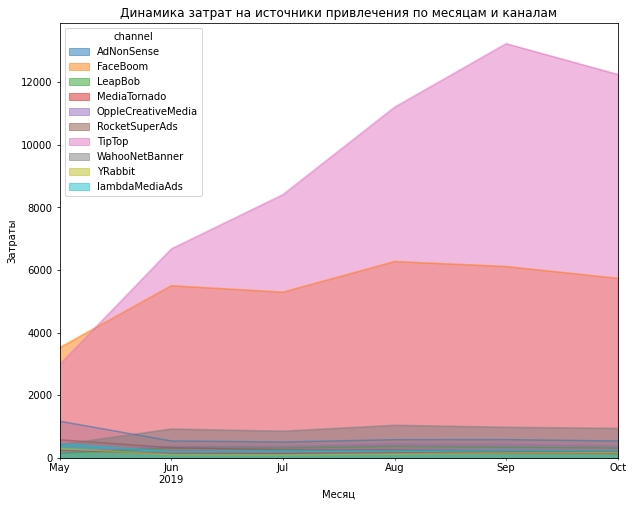

In [33]:
#строим сводную таблицу 
costs.pivot_table(
    index='month', 
    columns='channel', 
    values='costs', 
    aggfunc='sum').plot.area( # строим график по сводной таблице 
    stacked=False,
    xlabel='Месяц',
    ylabel='Затраты',
    figsize=(10,8),
    title='Динамика затрат на источники привлечения по месяцам и каналам');

#### Выводы:


По графику можно сказать, что затраты на привлечение пользователей по месяцам и каналам:
* были больше всего на каналы привлечения TipTop и FaceBoom: затраты на эти каналаы привлечения росли с мая по сентябрь, далее отмечается снижение затрат на эти каналы
* в мае наибольшие затраты были на источник привлечения FaceBoom, далее начиная с июня и по октябрь-наибольшие затраты были по источнику привлечения TipTop.
* с июня увеличились затраты на канала привлечения WahooNetBanner, далее не затраты не изменлясь 
* с мая по июнь уменьшились затраты на источник привлечения AdNonSense,далее не затраты не изменлясь 
* по остальным каналам затраты уменьшились с июня, далее не изменялись (судя по графику)

### Затраты на источники привлечения по дням и каналам

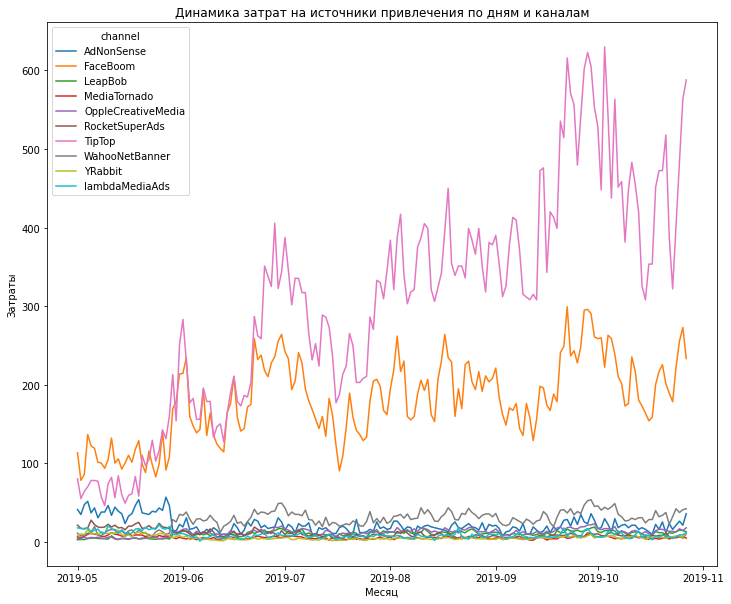

In [34]:
costs.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs', 
    aggfunc='sum').plot( # строим график по сводной таблице 
    stacked=False,
    xlabel='Месяц',
    ylabel='Затраты',
    figsize=(12,10),
    title='Динамика затрат на источники привлечения по дням и каналам');

#### Выводы:

По графику видно, что затраты на источник привлечения TipTop  росли ежемесячно, затраты на источник привлечения  FaceBoom выросли в мае и июне, а с июля были на 2 месте по уровню затрат.

### Расходы на маркетинг по дням

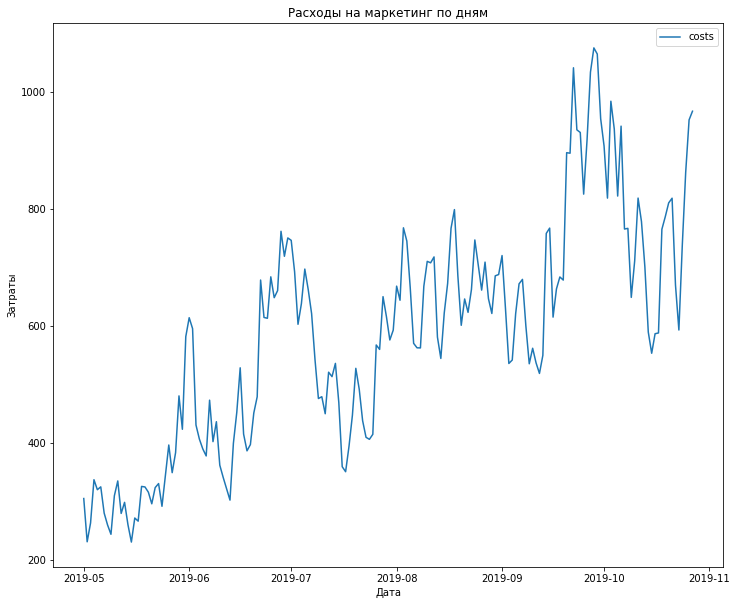

In [35]:
costs.pivot_table(
    index='dt', 
    values='costs', 
    aggfunc='sum').plot( # строим график по сводной таблице 
    stacked=False,
    xlabel='Дата',
    ylabel='Затраты',
    figsize=(12,10),
    title='Расходы на маркетинг по дням');

#### Выводы:

По графикам видно, что затраты на маркетинг в целом  росли с мая по октябрь

### Расходы на маркетинг по месяцам

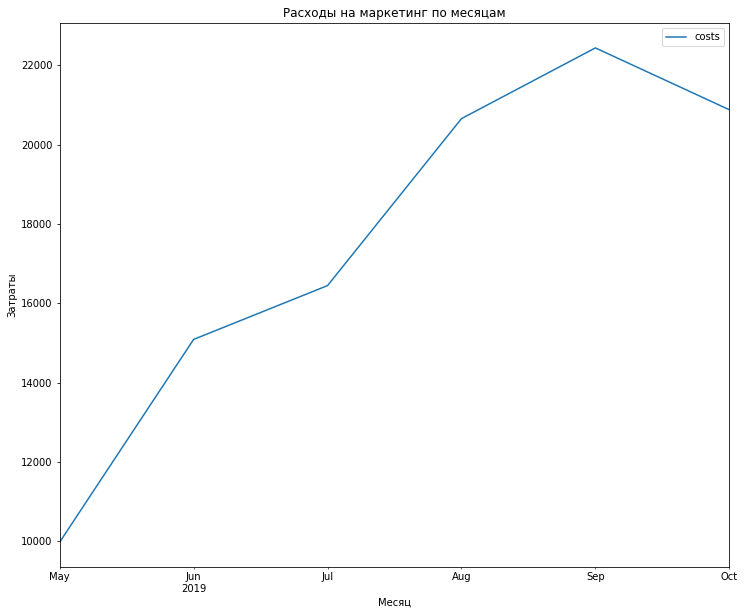

In [36]:
costs.pivot_table(
    index='month', 
    values='costs', 
    aggfunc='sum').plot( # строим график по сводной таблице 
    stacked=False,
    xlabel='Месяц',
    ylabel='Затраты',
    figsize=(12,10),
    title='Расходы на маркетинг по месяцам');

#### Вывод: 

По графику видно, что расходы на маркетинг увеличиваются с мая по октябрь

#### Выводы: 

1. Общие затраты на привлечение пользователей в период с 01.05.2019 по 27.10.2019 гг составили -105.497 тыс.

2. Затраты по источникам привлечения пользователей:
* на источник TipTop затраты были больше всего (относительно других источников)
* на источник YRabbit затраты были меньше всего

3.  Затраты на привлечение пользователей по месяцам и каналам:
* были больше всего на каналы привлечения TipTop и FaceBoom: затраты на эти каналаы привлечения росли с мая по сентябрь, далее отмечается снижение затрат по этим каналам
* в мае наибольшие затраты были на источник привлечения FaceBoom, далее начиная с июня и по октябрь-наибольшие затраты были по источнику привлечения TipTop.
* с июня увеличились затраты на канала привлечения WahooNetBanner, далее не затраты не изменлясь 
* с мая по июнь уменьшились затраты на источник привлечения AdNonSense,далее не затраты не изменлясь 
* по остальным каналам затраты уменьшились с июня, далее не изменялись (судя по графику)

### Стоимость привлечения одного клиента 

Выясним:
* сколько в среднем стоило привлечение одного пользователя для всего проекта 
* сколько в среднем стоило привлечение одного покупателя из каждого источника 

In [37]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Расчитаем стоимость привлечения одного пользователя для всего проекта:

In [38]:
cac_total = profiles['acquisition_cost'].mean()
f'Стоимость привлечения одного пользователя для всего проекта:{cac_total:.3}'.format(cac_total)

'Стоимость привлечения одного пользователя для всего проекта:0.703'

Таким образом, стоимость привлечения одного пользователя для всего проекта примерно 70 центов 

Рассмотрим стоимость привлечения пользователей по каналам (кроме канала organic):

In [39]:
# строим график истории изменений CAC по каналам привлечения

profiles.query('channel != "organic"').pivot_table(   #исключаем канал-органик, и строим сводную таблицу
    index='channel',  values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


#### Выводы:


1. Привлечение одного пользователя для всего проекта стоило около 70 центов 


2. Привлечение одного покупателя из каждого источника в среднем стоило:
* TipTop - 2,7 доллара 
* FaceBoom - 1,1 доллара
* AddNonSence - 1 доллар
* LambdaMediaAds - около 72 центов 
* WahooNetBanner - около 60 центов 
* RocketSuperAds - около 42 центов
* OppleCreativeMedia - 25 центов
* YRabbit -21 цент
* MediaTornado - 21 цент 
* LeapBob - 21 цент 


## Окупаемость рекламы для привлечения пользователей

На данном этапе исследования мы изучим: 
* общую окупаемость рекламы
* окупаемость рекламы с разбивкой по устройствам
* окупаемость рекламы с разбивкой по странам
* окупаемость рекламы с разбивкой по рекламным каналам 
* конверсию с разбивкой по устройствам, странам, рекламным каналам
* удержание с разбивкой по устройствам, странам, рекламным каналам

И после изучения результатов ответим на следующие вопросы:
* окупается ли реклама, направленная на привлечение пользователей в целом? 
* какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* чем могут быть вызваны проблемы окупаемости

Дата изучения данных, то есть момент анализа (по условиях проекта): 01.11.2019 год. В компании принято, что окупаемость должна наступать не позже, чем через 14 дней после привлечения пользователя.

Таким образом:
* момент анализа-01.11.2019 год
* горизонт анализа -14 дней. 

В анализе необходимо будет использовать только тех пользователей, которые "прожили" 14 дней.Зададим момент анализа и горизонт анализа:

In [40]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

В таблице как один из каналов привлечения, предеставлен канал привлчения organic. То есть пользователи нашли приложение самостоятельно. Так как затрат на таких пользователей нет, они всегда окупаются. Поэтому исключим из нашего анализа organic  и сохраним данные в новой переменной (может в будущем пригодится исходный датафрейм со всеми каналами).

In [41]:
profiles_new = profiles.query('channel != "organic"') #формируем таблицу без органического канала
profiles_new.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000


In [42]:
visits_new = visits.query('channel != "organic"')
visits_new.head()

,user_id,region,device,channel,session_start,session_end
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05
10,589320347244,United States,Mac,YRabbit,2019-05-01 18:39:23,2019-05-01 20:03:15


### Общая окупаемость рекламы

Используем функцию расчета LTV и ROI без разбивки, так же построим графики общей окупаемости рекламы:

In [43]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days
)

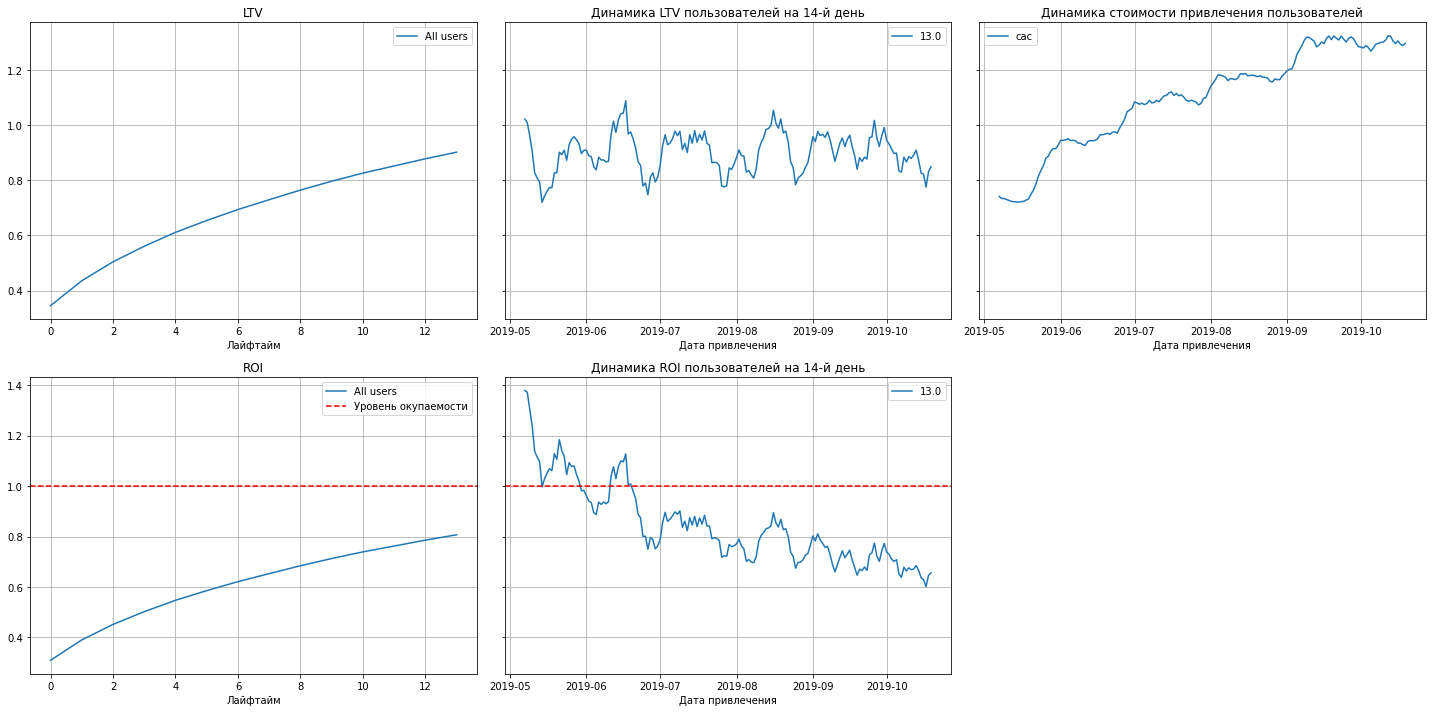

In [44]:
# строим графики по общим LTV и ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Выводы:

1. LTV плавно растет (т.е. пользователи качественные, которые приносят деньги)

Динамика LTV стабильна, а так же указывает, что имеется периодичность (то есть есть периоды-конец месяца, когда пользователи приносят меньше денег, а есть периоды-начало месяца, когда пользователи приносят больше денег)


2. CAC показывает, что затраты на маркетинг резко увеличились с мая и далее продолжили рост до октября.


3. ROI показывает, что инвестиции в маркетинг не окупаются - в конце 2й недели чуть больше 80 %. 

Динамика ROI говорит, что возврат инвестиций на маркетинг резко упал с мая по июнь и далее продолжил снижение (инвестиции на маркетинг окупались только в мае и июне)



Графики отражают проблему, с которой пришел заказчик: расходы на маркетинг растут, при этом возврат инвестиции на маркетинг  снижается. 

Рассмотрим графики с разбивкой по устройствам, старнам и каналам.

### Окупаемость рекламы с разбивкой по устройствам

Рассмотрим окупаемость рекламы с разбивкой по устройствам

In [45]:
# считаем LTV и ROI с разбивкой по устройствам

dimensions = ['device']

ltv_raw_dev, ltv_grouped_dev, ltv_history_dev, roi_grouped_dev, roi_history_dev = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

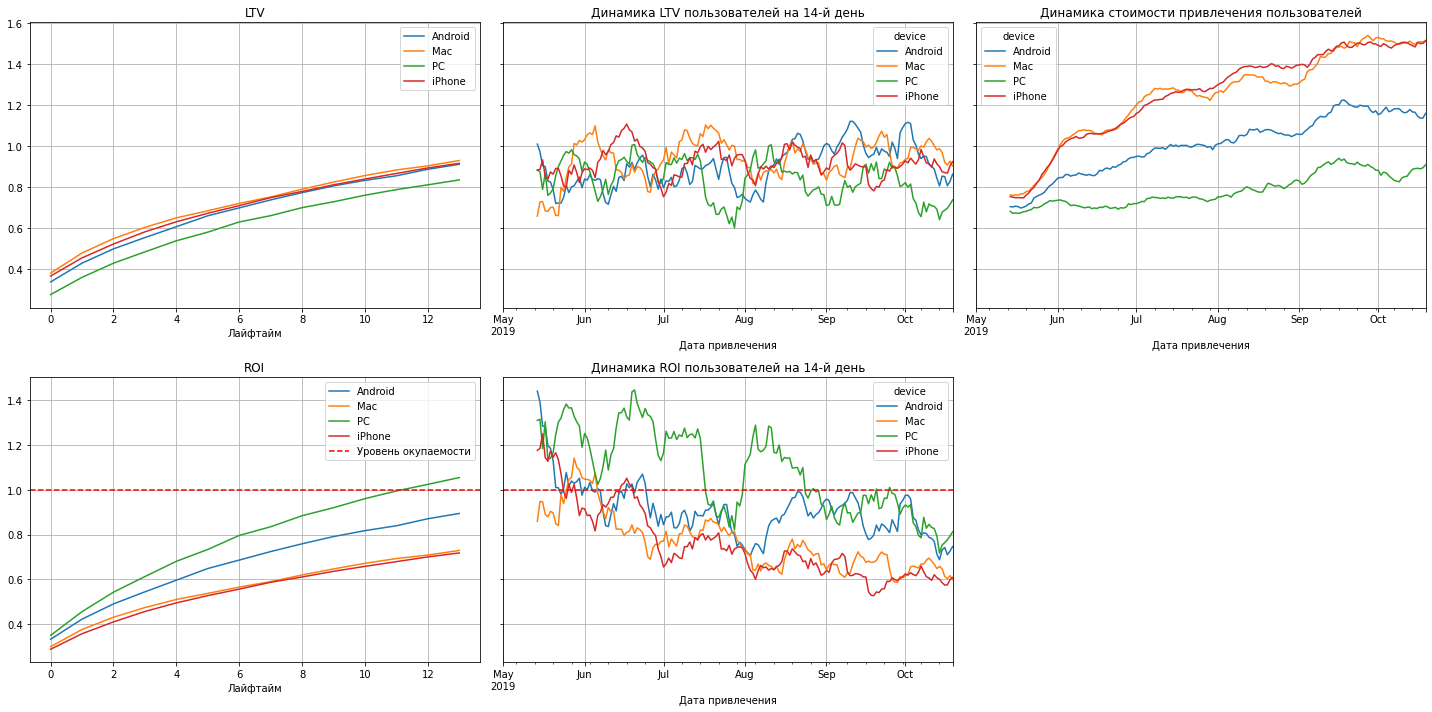

In [46]:
#построим графики 
plot_ltv_roi(
    ltv_grouped_dev, ltv_history_dev, roi_grouped_dev, roi_history_dev, horizon_days, window=14
)

#### Выводы:

1. LTV плавно растет, лучше всего окупаются пользователи с устройствами Mac, Iphone, PC


Динамика LTV стабильна, так же имеется периодичность (то есть есть периоды-конец месяца, когда пользователи приносят меньше денег, а есть периоды-начало месяца, когда пользователи приносят больше денег)


2. CAC показывает, что стоимость привлечения пользователей с устройствами:
* Iphone и Mac  растет с мая и затраты на их привлечение больше всего
* PC так же растет с мая, но затраты на их привлечение меньше всего


3. ROI:
* инвестиции в маркетинг окупаются только у пользователей PC
* инвестиции в маркетинг не окупаются у пользователей Iphone, Mac, Android

Динамика ROI стабильно снижалась и до сентября окупалась только у пользователей PС, после сентября не окупалась ни на одном устройстве


Первая зацепка есть: 
* инвестиции в маркетинг пользователей Iphone,Mac и Android  растут, при этом инвестиции в маркетинг не окупаются  так же у пользователей Iphone, Mac и Android

### Окупаемость рекламы с разбивкой по странам

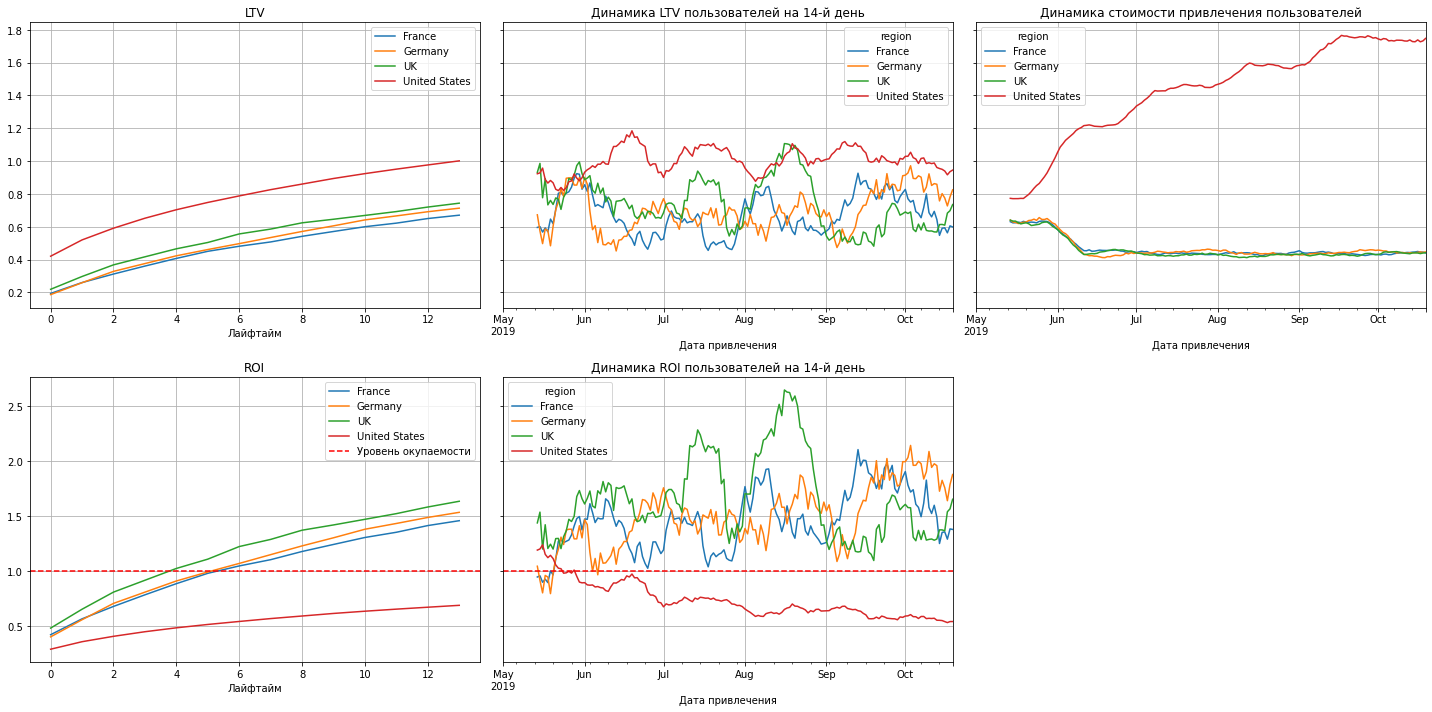

In [47]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw_reg, ltv_grouped_reg, ltv_history_reg, roi_grouped_reg, roi_history_reg = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped_reg, ltv_history_reg, roi_grouped_reg, roi_history_reg, horizon_days, window=14
)

#### Выводы:

1. LTV плавно растет, больше всего прибыли приносят пользователи из Америки


Динамика LTV стабильна, не растет и не снижается ни для одной старны 


2. CAC показывает, что стоимость привлечения пользователей:
* из Америки растет с мая и затраты на их привлечение больше всего, а затраты на привлечение пользователей из лругих стран снижаются с июня.

3. ROI:
* инвестиции в маркетинг не окупаются только у пользователей из Америки 

Динамика ROI  пользователей из Америки резко снижается и с июля только пользователи из Америки не окупаются 



Вторая зацепка есть: 
* инвестиции в маркетинг пользователей из Америки растут, при этом только у пользователей из Америки инвестиции в маркетинг не окупаются  

### Окупаемость рекламы с разбивкой по рекламным каналам

In [48]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw4, ltv_grouped4, ltv_history4, roi_grouped4, roi_history4 = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

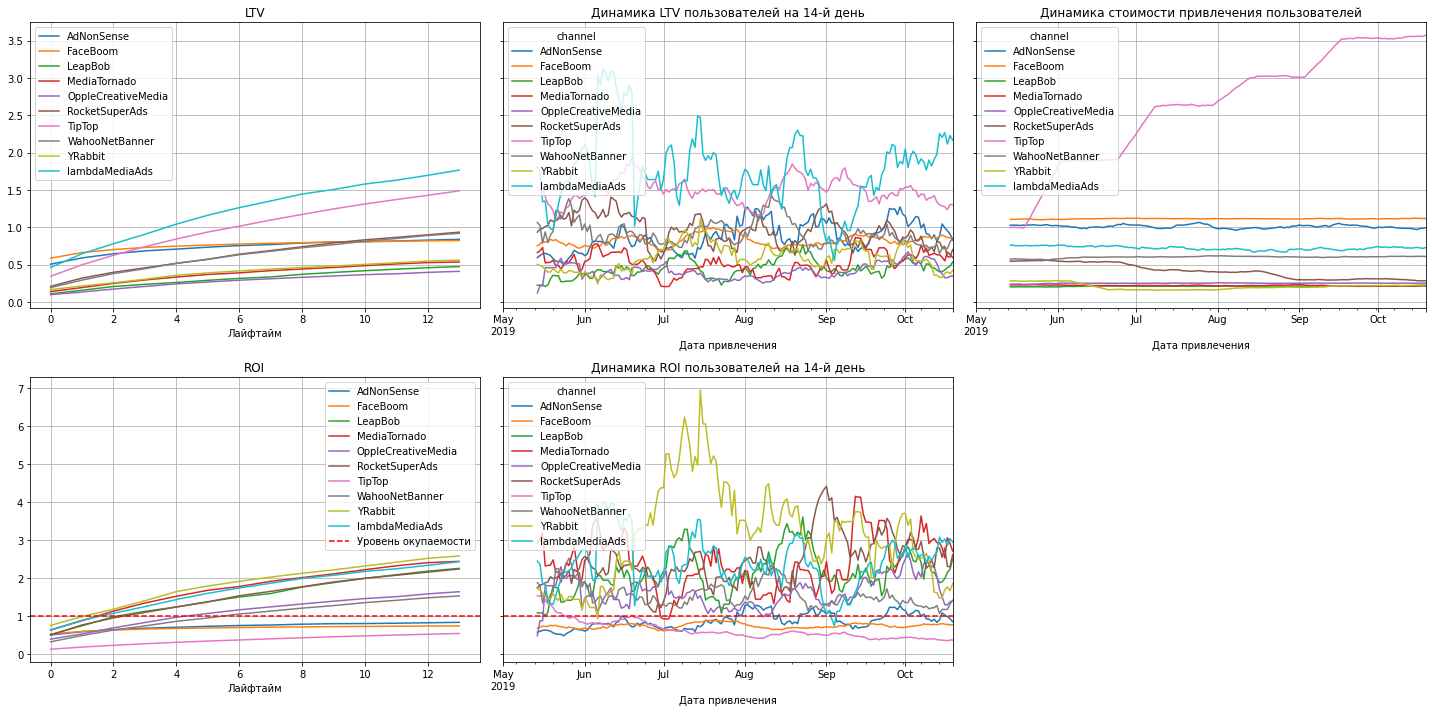

In [49]:
plot_ltv_roi(
    ltv_grouped4, ltv_history4, roi_grouped4, roi_history4, horizon_days, window=14
)

#### Выводы:

1. LTV , то есть прибыль плавно растет, всем по каналам привлечения, кроме FaceBoom, AdNonSense. 
Но следует отметить, что привлечение одного клиента по каналу TipTop стоило 2.7 долларов. А прибыль которую принесли в среднем пользователи в конце 2-й недели примерно 1.5 доллара


Динамика LTV стабильна, не растет и не снижается ни для одного канала


2. CAC показывает, что стоимость привлечения пользователей:
* по источнику TipTop растет с июня и затраты на привлечение пользователей по этому каналу самые большие
* затраты на привлечение пользователей по остальным каналам не изменяется 

3. ROI:
* инвестиции в маркетинг не окупаются по каналам  TipTop, FaceBoom и AdNonSense 

Динамика ROI  каналов FaceBoom и AdNonSense не окупалась с мая,  а ROI канала привлечения TipTop не окупается с июня 



Третья зацепка есть: 
инвестиции в маркетинг канала  TipTop растут, при этом у канала TipTop инвестиции в маркетинг не окупаются. Инвестиции в маркетинг по каналам  FaceBoom и AdNonSense  не окупаются
 
 
 **Таким образоом, мы имеем следующие зацепки:**

1. Инвестиции в маркетинг пользователей Iphone,Mac и Android  растут, при этом инвестиции в маркетинг не окупаются  так же у пользователей Iphone, Mac и Android


2. Инвестиции в маркетинг пользователей из Америки растут, при этом только у польлзователей из Америки инвестиции в маркетинг не окупаются  
    
3. Инвестиции в маркетинг канала  TipTop растут, при этом у канала TipTop инвестиции в маркетинг не окупаются. Инвестиции в маркетинг по каналам  FaceBoom и AdNonSense  не окупаются

Рассмотрим конверсию и удержание по устройствам, странам и каналам

### Конвесрия пользователей по устройствам 

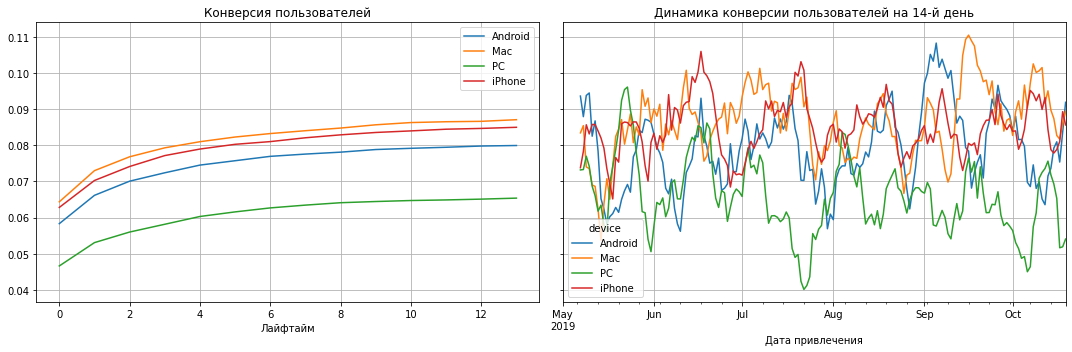

In [50]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw_dev, conversion_grouped_dev, conversion_history_dev = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped_dev, conversion_history_dev, horizon_days)

#### Выводы:

1. По графикам можно сказать, что пользователи Iphone, Mac, Android хорошо конвертируются.
Пользователи PC конвертируются хуже

### Конвесрия пользователей по странам 

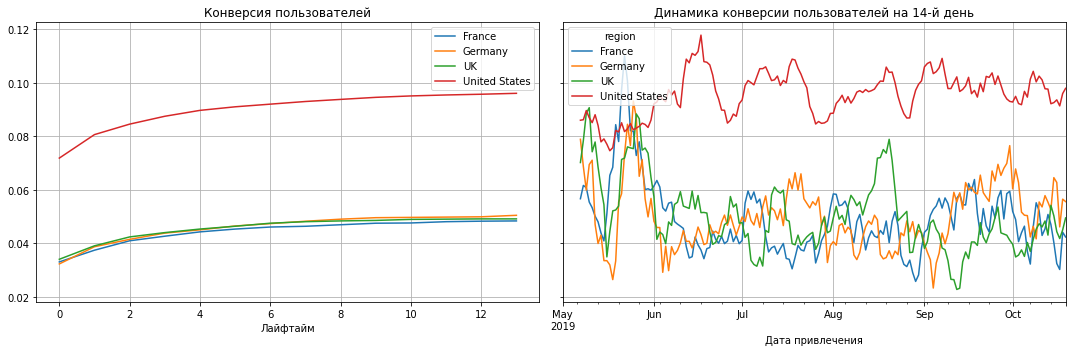

In [51]:
# смотрим конверсию с разбивкой по старанам

dimensions = ['region']

conversion_raw_reg, conversion_grouped_reg, conversion_history_reg = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped_reg, conversion_history_reg, horizon_days)

#### Выводы:

1. По графикам можно сказать, что пользователи из Америки хорошо конвертируются. 

Конверсия пользователей из Франции, Германии и Великобритании с 7 лайфтайма не изменяется и выходит на плато, а с 12 лайфтайма конверсия  пользователей из Франции, Германии и Великобритании меньше на 25 % , чем  пользователей из Америки.

### Конвесрия пользователей по каналам 

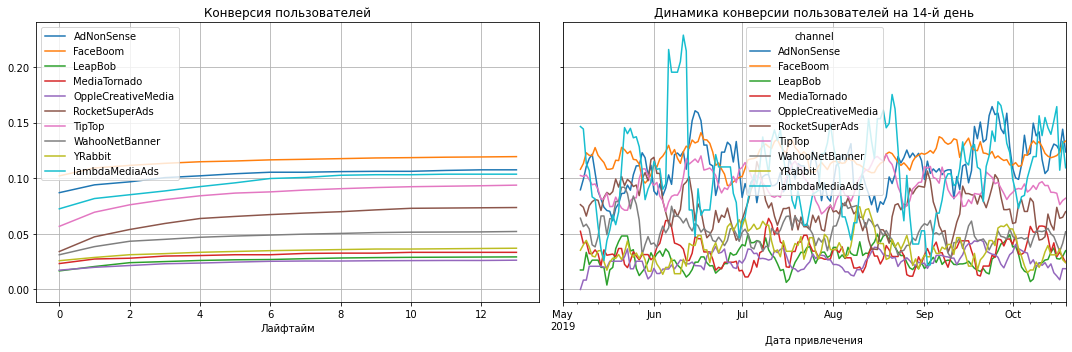

In [52]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw_chan, conversion_grouped_chan, conversion_history_chan = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped_chan, conversion_history_chan, horizon_days)

#### Выводы:

1. По графикам можно сказать, что конверсия всех каналаов не растет и выходит на плато конверсии  с 2-4 лайфтайма. 

То есть пользователи привлеченные по всем каналам плохо конвертируются, тк конверсия не увеличивается.


**Таким образом, мы выяснили:**

1. Пользователи всех устройств, кроме РС- хорошо конвертируются.

2. Пользователи из Америки хорошо конвертируются. 

Конверсия пользователей из Франции, Германии и Великобритании с 7 лайфтайма не изменяется и выходит на плато, а с 12 лайфтайма конверсия  пользователей из Франции, Германии и Великобритании меньше на 25 % , чем  пользователей из Америки.

3. Пользователи по всем каналам привлечения плохо конвертируются 


### Удержание пользователей по устройствам 

Рассмотрим удержание пользователей в разбивке по устройствам, странам и каналам

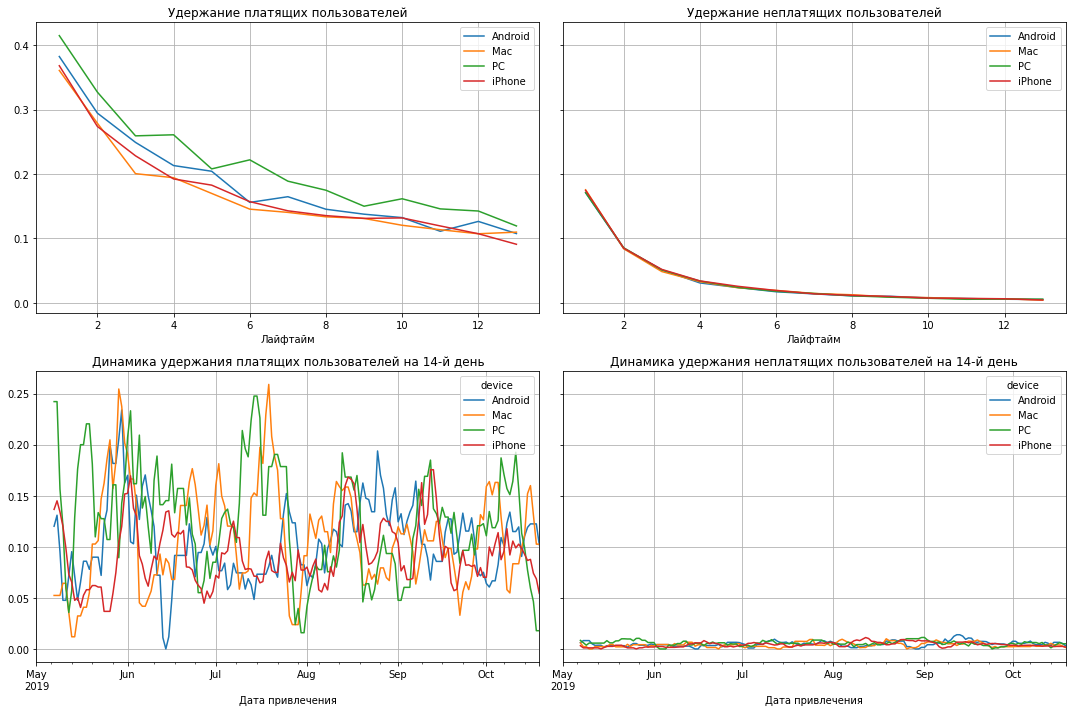

In [53]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']


retention_raw_dev, retention_grouped_dev, retention_history_dev = get_retention(
    profiles_new, visits_new, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped_dev, retention_history_dev, horizon_days)

#### Вывод:

Пользователи всех устройств стабильно плохо удерживаются. Для платящих пользователей всех устройств удержание 14-го дня   примерно 10 %. (изначально 40 %)

### Удержание пользователей по странам 

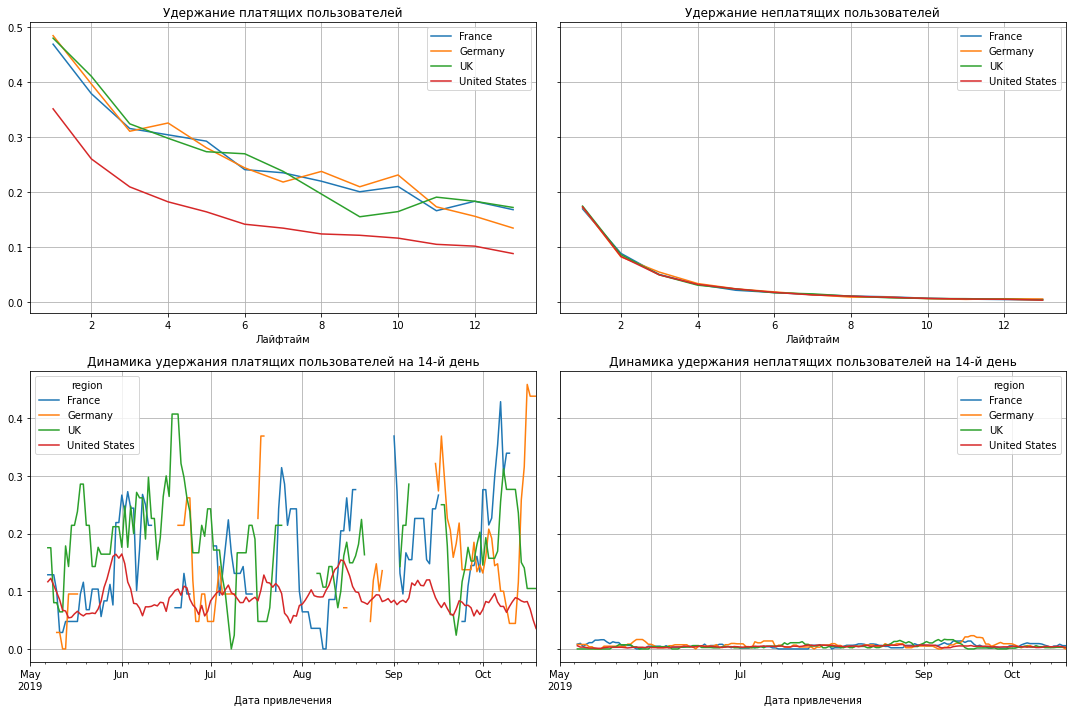

In [54]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits_new, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Вывод:

Пользователи из Америки удерживаются хуже, чем пользователи из Франции, Великобритании и Германии.

### Удержание пользователей по каналам 

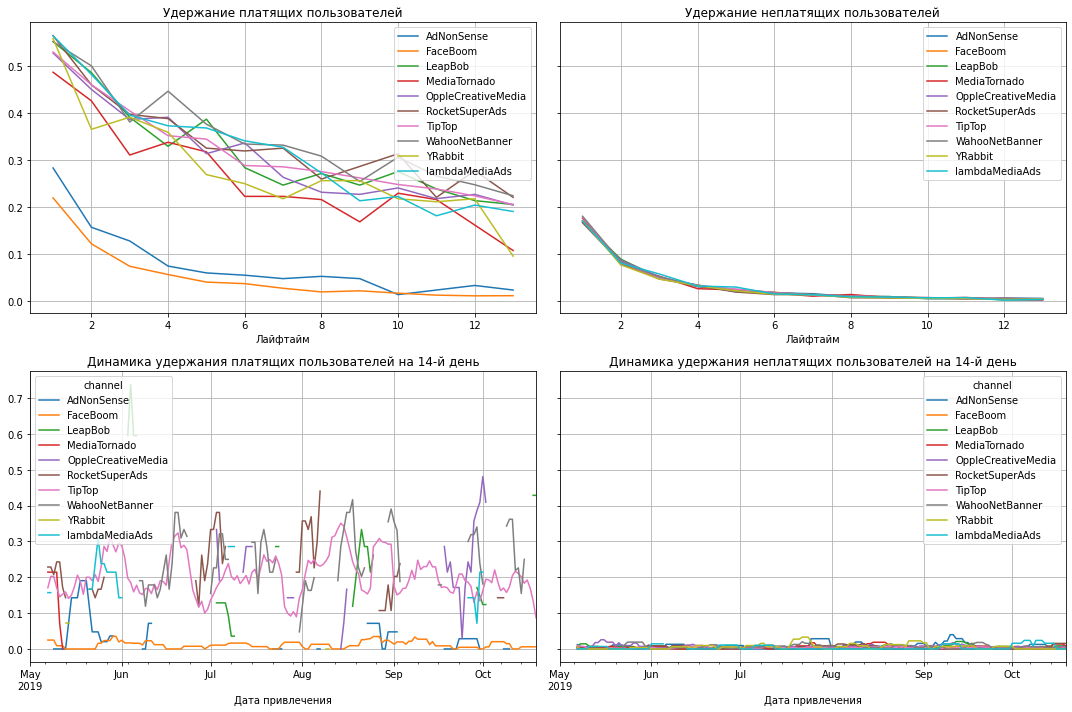

In [55]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits_new, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Вывод:
    
По графикам видно, что хуже всего удержание пользователей из каналов привлечения AdNonSense, FaceBoom

## Общие выводы:

**В ходе исследования, было установлено, что:**

1. Реклама, направленная на привлечение пользователей в целом не окупаются 

Возврат инвестиций на маркетинг резко упал в июле и далее продолжил снижение (инвестиции на маркетинг окупались только в мае и июне)


2. Инвестиции в маркетинг пользователей Iphone,Mac и Android  растут, при этом инвестиции в маркетинг не окупаются  так же у пользователей Iphone, Mac и Android. То есть, эти устройства оказывают негативное влияние на окупаемость рекламы.


2. Инвестиции в маркетинг пользователей из Америки растут, при этом только у пользователей из Америки инвестиции в маркетинг не окупаются. Таким образом, эта старна оказывает негативное влияние на окупаемость рекламы.

    
3. Инвестиции в маркетинг канала  TipTop растут, при этом у канала TipTop инвестиции в маркетинг не окупаются. Инвестиции в маркетинг по каналам  FaceBoom и AdNonSense  не окупаются, следовательно эти каналы оказывают негативное влияние на окупаемость рекламы.


**Возможные причины данных проблем:**

* Пользователи РС стабильно окупаются и лучше, чем другие пользователи других устройств удерживаются, но плохо конвертируются

Неравномерные инвестиции в рекламные компании по устройствам, то есть за счет большого количества пользователей с айфонами и мак буками, упор рекламной компаниии делается на них. Однако не следует забывать и о пользователям устрйств РС. 



* Конверсия пользователей из Америки хорошая, однако эти пользователи не окупаются и стабильно плохо удерживаются. Возможно есть технические проблемы, которые возникают именно у пользователей из Америки. Обратим внимание, что удержание уменьшается к концу 2-й недели


Инвестиции  в маркетинг по странам вероятнее всего основывается на количестве пользователей: наибольшее количество пользователей из Америки, однако можно перерапсределить рекламный бюджет так же на другие страны, которые входят в топ-3 среди пользователей, то есть выделить не одну старну и инвестировать в маркетинг только этой страны, а выделить старны, которые чаще всего встречаются среди наших пользователей (например, топ -3 страны, в которых лучше всего "держатся" платящие пользователи) и распределать рекламный бюджет между этиими 3 странами, так как инвестиции в маркетинг во Франции, Германии и Великобритании снизились с июня, но реклама при этом окупается.



* Пользователи, привлеченный через такие каналы привлечение как AdNonSense, FaceBoom не окупаются, плохо конвертируются и плохо удерживаются


**Рекомендации для рекламного отдела:**


1. Перераспределить часть рекламного бюджета так, что бы охватить пользователей устройств PC (например уменьшив инвестиции в маркетинг на платформы Iphone,Mac и Android), а так же предложить пользователям РС выгодное условия использования приложения


2. Учитывая, что пользователи из Америки плохо удерживаются к концу 2-й недели можно предлагать выгодные условия пользователям из Америки. Так же при наличии данных о событяих, можно провести исследование на предмет технических ошибок. Возможно , необходимо перераспределить рекламный бюджет равномерно, между 3 странами где, удержание платящих пользователей и окупаемость наиболее высокие: Германия, Великобритания и Франция


3.  Использование таких каналов првлечения, как AdNonSense, FaceBoom не эффективно, так как эти каналы привлекают не "качественных" пользователей 


4. Полезно так же собирать данные о событиях (ошибках), что бы можно было провести ислледование глубже и проверить гипотезы. Возможно, в приложении есть сбор данных о событиях. Тогда, необходимо предоставлять его аналитику.